# Study on Weather in Palo Alto during 2014

Import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from datetime import datetime

%matplotlib inline

Load and inspect the data:

In [2]:
data = pd.read_csv('630613.csv', parse_dates=True, index_col=5)

In [3]:
data.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,MDPR,Measurement Flag,Quality Flag,Source Flag,Time of Observation,...,TMIN,Measurement Flag.4,Quality Flag.4,Source Flag.4,Time of Observation.4,TOBS,Measurement Flag.5,Quality Flag.5,Source Flag.5,Time of Observation.5
DATE,,,,,,,,,,,,,,,,,,,,,
2014-01-08,GHCND:US1CASC0017,PALO ALTO 1.2 NE CA US,9.8,37.4516,-122.1486,-9999,,,,9999,...,-9999,,,,9999,-9999,,,,9999
2014-01-09,GHCND:US1CASC0017,PALO ALTO 1.2 NE CA US,9.8,37.4516,-122.1486,-9999,,,,9999,...,-9999,,,,9999,-9999,,,,9999
2014-01-29,GHCND:US1CASC0017,PALO ALTO 1.2 NE CA US,9.8,37.4516,-122.1486,-9999,,,,9999,...,-9999,,,,9999,-9999,,,,9999
2014-01-30,GHCND:US1CASC0017,PALO ALTO 1.2 NE CA US,9.8,37.4516,-122.1486,-9999,,,,9999,...,-9999,,,,9999,-9999,,,,9999
2014-02-02,GHCND:US1CASC0017,PALO ALTO 1.2 NE CA US,9.8,37.4516,-122.1486,-9999,,,,9999,...,-9999,,,,9999,-9999,,,,9999


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 358 entries, 2014-01-08 to 2014-12-31
Data columns (total 35 columns):
STATION                  358 non-null object
STATION_NAME             358 non-null object
ELEVATION                358 non-null float64
LATITUDE                 358 non-null float64
LONGITUDE                358 non-null float64
MDPR                     358 non-null int64
Measurement Flag         358 non-null object
Quality Flag             358 non-null object
Source Flag              358 non-null object
Time of Observation      358 non-null int64
DAPR                     358 non-null int64
Measurement Flag.1       358 non-null object
Quality Flag.1           358 non-null object
Source Flag.1            358 non-null object
Time of Observation.1    358 non-null int64
PRCP                     358 non-null int64
Measurement Flag.2       358 non-null object
Quality Flag.2           358 non-null object
Source Flag.2            358 non-null object
Time of Observation.2  

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ELEVATION,358,7.944134,0.800285,7.6000,7.6000,7.6000,7.6000,9.8000
LATITUDE,358,37.444851,0.002910,37.4436,37.4436,37.4436,37.4436,37.4516
LONGITUDE,358,-122.141514,0.003056,-122.1486,-122.1402,-122.1402,-122.1402,-122.1402
MDPR,358,-9999.000000,0.000000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000
Time of Observation,358,9999.000000,0.000000,9999.0000,9999.0000,9999.0000,9999.0000,9999.0000
DAPR,358,-9999.000000,0.000000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000
Time of Observation.1,358,9999.000000,0.000000,9999.0000,9999.0000,9999.0000,9999.0000,9999.0000
PRCP,358,22.717877,79.004104,0.0000,0.0000,0.0000,5.0000,1003.0000
Time of Observation.2,358,2238.949721,3346.281577,800.0000,800.0000,800.0000,800.0000,9999.0000
TMAX,358,-1463.332402,3797.247070,-9999.0000,156.0000,200.0000,256.0000,344.0000


### Clean the data:

In [6]:
data = data.replace([-9999, 9999], [np.nan, np.nan])

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ELEVATION,358,7.944134,0.800285,7.6000,7.6000,7.6000,7.6000,9.8000
LATITUDE,358,37.444851,0.002910,37.4436,37.4436,37.4436,37.4436,37.4516
LONGITUDE,358,-122.141514,0.003056,-122.1486,-122.1402,-122.1402,-122.1402,-122.1402
MDPR,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time of Observation,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAPR,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time of Observation.1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRCP,358,22.717877,79.004104,0.0000,0.0000,0.0000,5.0000,1003.0000
Time of Observation.2,302,800.000000,0.000000,800.0000,800.0000,800.0000,800.0000,800.0000
TMAX,299,220.963211,51.654979,111.0000,183.0000,222.0000,258.5000,344.0000


In [8]:
data['TMIN'] = data['TMIN'] / 10. # All temperatures to tenths. Convert temperatures to Celcius.

In [9]:
data['TMAX'] = data['TMAX'] / 10. # All temperatures to tenths. Convert temperatures to Celcius.

### Temperatures in Palo Alto

In [10]:
data['TMEAN'] = pd.DataFrame(data, columns=['TMIN','TMAX']).mean(axis=1)
pd.DataFrame(data, columns=['TMIN','TMAX','TMEAN']).describe().T

,count,mean,std,min,25%,50%,75%,max
TMIN,299,9.430100,3.657872,-2.2,7.2,10.00,11.95,16.7
TMAX,299,22.096321,5.165498,11.1,18.3,22.20,25.85,34.4
TMEAN,299,15.763211,3.966303,6.1,12.8,15.85,19.15,24.4


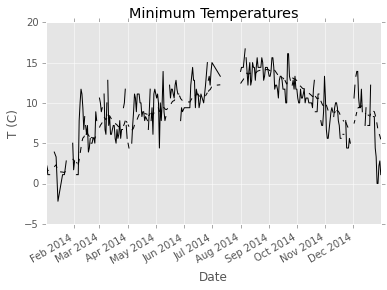

In [11]:
data.TMIN.plot(style='k')
ax = pd.ewma(data.TMIN, 10).plot(x='Date',y='T (C)',style='k--', title='Minimum Temperatures')
ax.set_xlabel('Date')
ax.set_ylabel('T (C)')

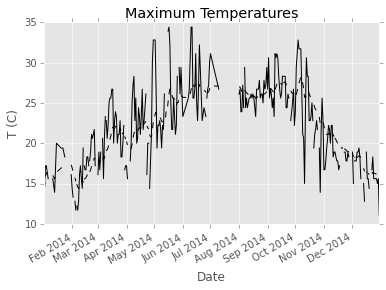

In [12]:
data.TMAX.plot(style='k')
ax = pd.ewma(data.TMAX, 10).plot(x='Date',y='T (C)',style='k--', title='Maximum Temperatures')
ax.set_xlabel('Date')
ax.set_ylabel('T (C)')

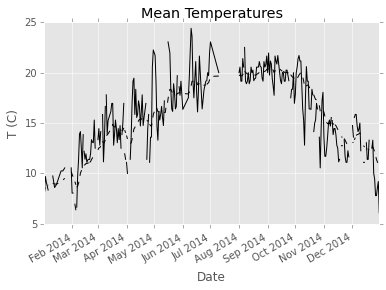

In [13]:
data.TMEAN.plot(style='k')
ax = pd.ewma(data.TMEAN, 10).plot(x='Date',y='T (C)',style='k--', title='Mean Temperatures')
ax.set_xlabel('Date')
ax.set_ylabel('T (C)')

### Observations:

The plots show a general increase in temperature until mid-September. After that, there is a sharp decrease in temperature until the end of November. At the beginning of December there is a small spike in the average temperature.

## Precipitation

In [14]:
data['PRCP'] = data['PRCP'] / 10. # convert to mm

In [15]:
by_month = data.groupby(lambda x: x.month)

In [16]:
data_by_month = by_month.apply(sum)

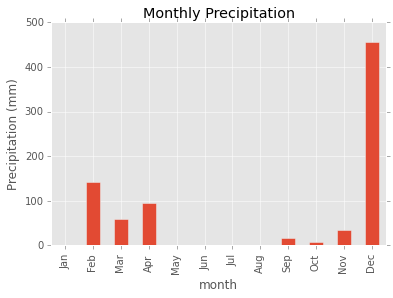

In [17]:
ax = data_by_month['PRCP'].plot(kind='bar', title='Monthly Precipitation')
ax.set_xlabel('month')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_ylabel('Precipitation (mm)')

### Observations:

The plot shows December was the rainest month of 2014.